# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv("yulu_rental.csv")

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
#Кількість даних у наборі
df.shape
print(df.shape)
#Період в одному рядку даних
time_diffs = df.index.diff().dropna()
print(time_diffs)

(10886, 19)
TimedeltaIndex(['0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00',
                ...
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00', '0 days 01:00:00', '0 days 01:00:00',
                '0 days 01:00:00'],
               dtype='timedelta64[ns]', name='datetime', length=10885, freq=None)


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


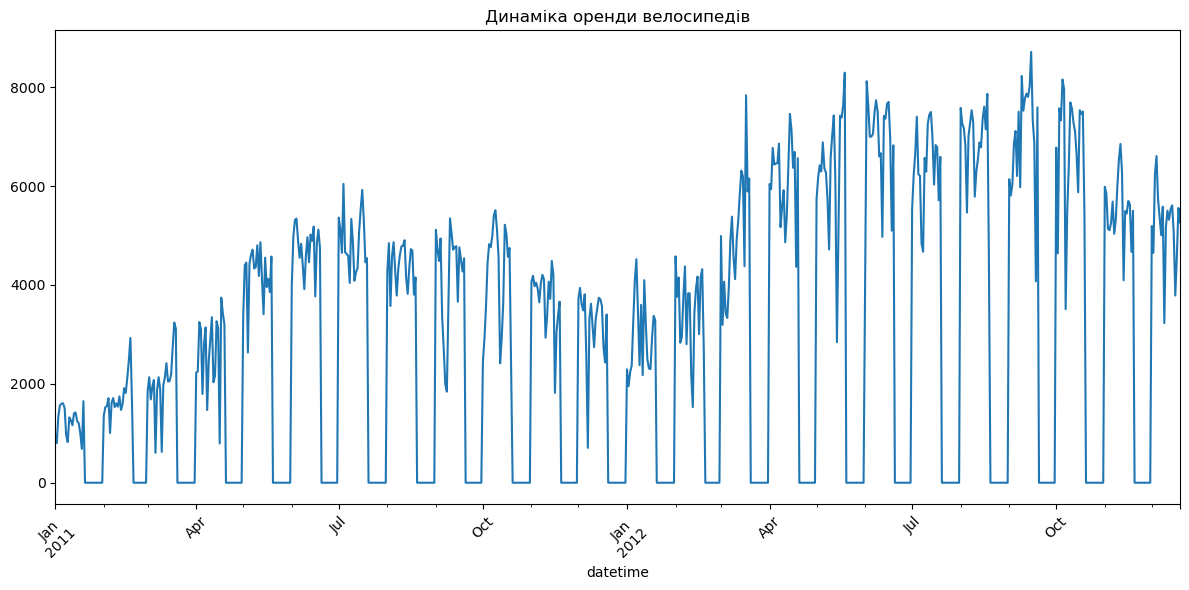

In [4]:
daily_counts = df['count'].resample('D').sum()
daily_counts.plot(
    figsize=(12, 6), title='Динаміка оренди велосипедів'
)
# Форматування на осі X
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"Заломи" можуть бути спричинені відсутністю даних про окремі години або дні. В такому разі показники падають до 0 й утворюється "залом". Це можна було б прибрати, прибравши незаповнені записи. Нижче представлений варіант вирішення проблеми "заломів".

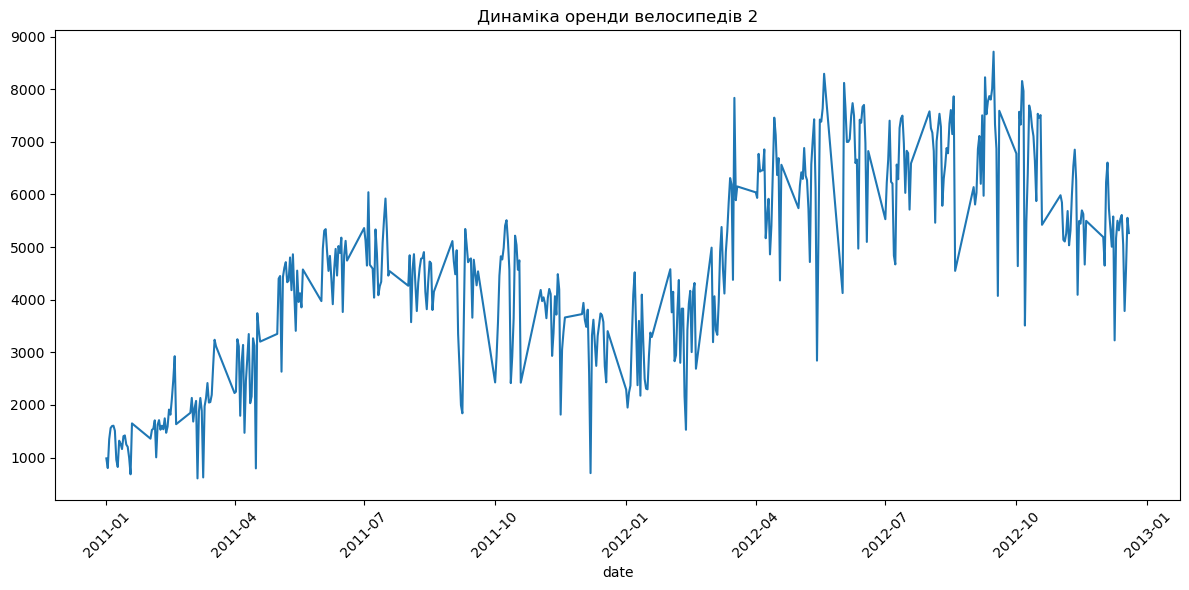

In [5]:
df['date'] = df.index.date
daily_counts_actual = df.groupby('date')['count'].sum()

daily_counts_actual.plot(
    figsize=(12, 6), title='Динаміка оренди велосипедів 2'
)
# Форматування на осі X
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

За графіком видно, що загальна кількість орендованих велосипедів має сезонну залежність і тенденцію зростати з часом. Так кожного сезону літо-осінь кількість замовлень більша, ніж в інші сезони, при цьому кожного наступного літа та осені кількість замовлень більша, ніж попереднього. Це показує стабільний позитивний приріст клієнтської бази.

Пікові дні можуть бути спричинені днем тижня, або святами, коли люди могли орендувати велосипеди для, наприклад, прогулянок частіше.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

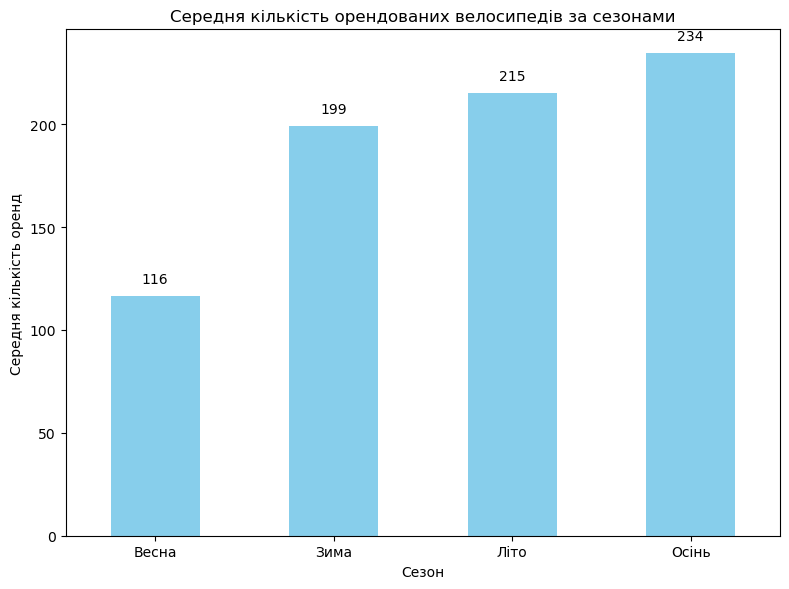

In [6]:
seasons = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
}

#Додаємо колонку з назвами сезонів
df['season_name'] = df['season'].map(seasons)

season_avg = df.groupby('season_name')['count'].mean().sort_index()

season_avg.plot.bar (
    figsize = (8, 4),
    # color='skyblue',
    title ='Cередньої кількості орендованих велосипедів за сезонами',
    xlabel = 'Сезон',
    ylabel = 'Середня кількість оренд',
)
plt.xticks(rotation=45)
plt.tight_layout()

#Створення підписів над стовпцями

ax = season_avg.plot.bar(
    figsize=(8, 6),
    color='skyblue',
    title='Середня кількість орендованих велосипедів за сезонами',
    xlabel='Сезон',
    ylabel='Середня кількість оренд'
)

for i, value in enumerate(season_avg):
    ax.text(i, value + 5, f'{value:.0f}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Найбільше замовлень припадає на осінній сезон. Це може бути спричинено погодними причинами, коли влітку й восени приємніше їздити на велосипеді, ніж, наприклад, взимку чи ранньої весни. Можливо, попит на замовлення в ці сезони спричинений початком академічного року, який найчастіше починається в період літо-осінь і більше студентів орендує велосипеди аби пересуватись кампусом, або добиратись до школи.

In [10]:
max_count = season_avg.max()
min_count = season_avg.min()
ratio = max_count / min_count
print (f'Оренда між найпопулярнішим та найменш популярним сезоном відрізнається в {ratio:.2f} разів')

Оренда між найпопулярнішим та найменш популярним сезоном відрізнається в 2.01 разів


Отже різниця між популярним сезоном (осінню) й непопуляним (зимою), значна - попит різниця в 2 рази, що є значним показником, на який треба зважати й який, можливо, вартий додатковго аналізу.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


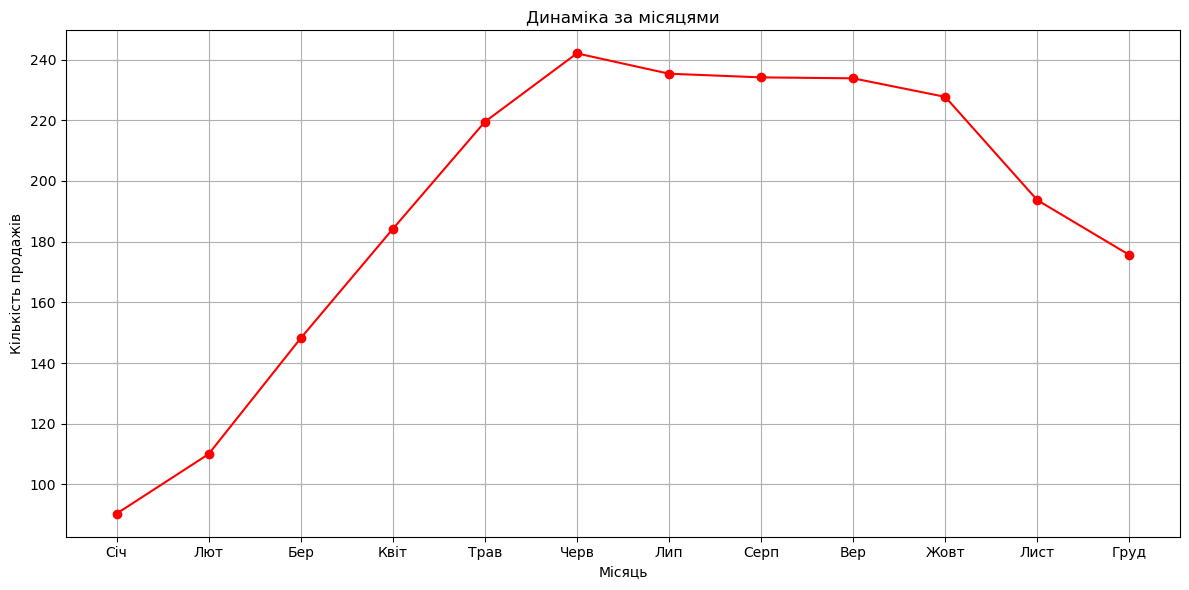

In [22]:
monthly_avg = df.groupby(df['month'])['count'].mean()

monthly_avg.plot(
    figsize=(12, 6),
    marker='o',
    title='Динаміка за місяцями',
    xlabel = 'Місяць',
    ylabel = 'Кількість продажів',
    grid= True,
    color= 'red'
)
month_names = [
    'Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв',
    'Лип', 'Серп', 'Вер', 'Жовт', 'Лист', 'Груд'
]
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.tight_layout()
plt.show()


Графік динаміки за місяцями вказує на деякі розбіжності з результатами попереднього завдання, де ми розглядали динаміку по сезонах. Тут найприбутковішим є перод літа, так як піковим виявився Червень. При цьому період кінць літа-початок осені все ще є стабільно прибутковішим у порівнянні з іншими сезонами. Найменш прибутковими є зимові місяця й на ці періоди припадає спад. Скоріш за все ця динаміка буде зберігатись для країн з помірно-континентальним кліматом, де саме цей період є найсприятливішим для прогулянок чи подорожей велосипедом. Можливо, для тепліших країн, чи навпаки, для країн, де загалом частіше холодно, динаміка буде стабільнішої впродовж всього року.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

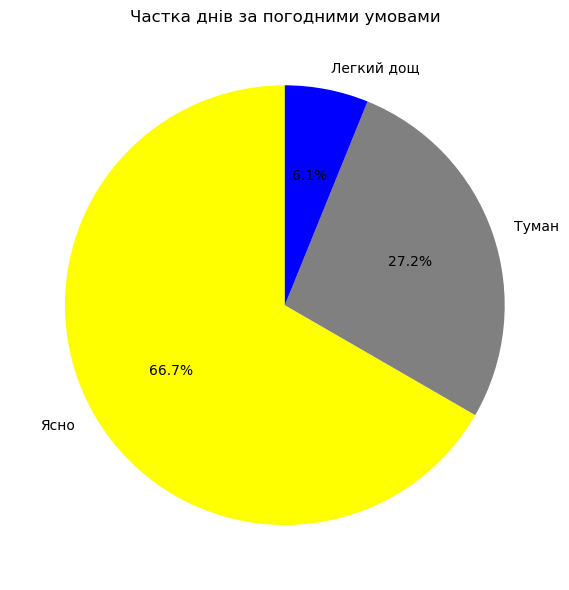

In [39]:
#Колонка з унікальними днями
daily_weather = df.groupby(df.index.date)['weather'].first()

weather = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

weather_counts = daily_weather.value_counts().sort_index()

colors = ['yellow', 'grey', 'blue', 'purple']

weather_counts.plot.pie(
    labels=[weather [i] for i in weather_counts.index],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    title='Частка днів за погодними умовами'
)
plt.ylabel('')  
plt.tight_layout()
plt.show()

У даному датасеті переважає ясна погода, що складає переважну більшість даних (66,7%). При цьому дні з сильним дощем відсутні. Скоріш за все, погодні умови є вагомим чинником для змін кількості замовлень. Таким чином можна зробити припущення, що клієнти найбільше замовляють послуги саме в дні ясної погоди, адже тоді ніщо не ускаднює рух велосипеда.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

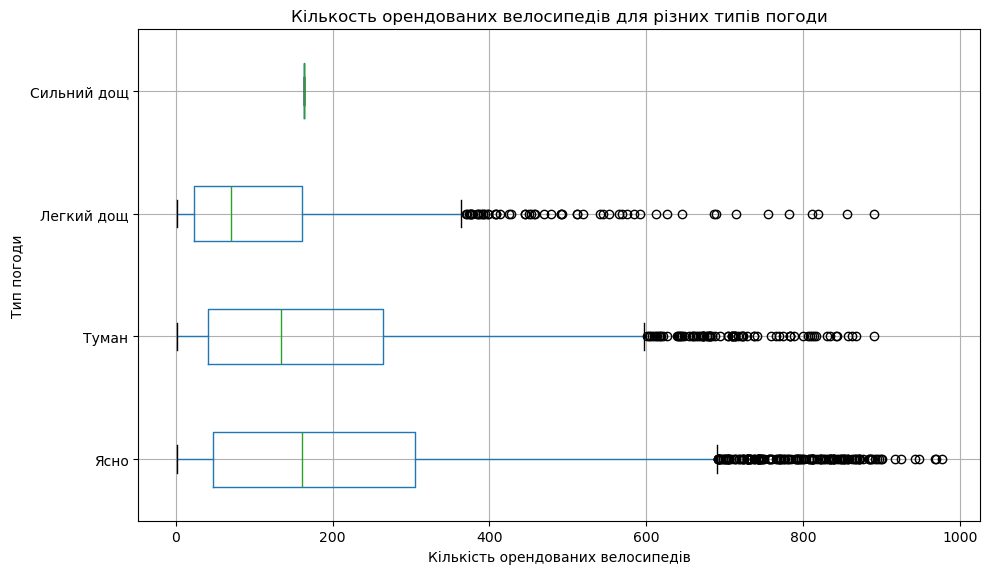

In [12]:
#Побудова горизонтального box plot
df.boxplot(
    column='count',
    by='weather',
    figsize=(10, 6),
    vert=False
)
plt.title('Кількость орендованих велосипедів для різних типів погоди')
plt.xlabel('Кількість орендованих велосипедів')
plt.ylabel('Тип погоди')
plt.suptitle('') 

#Підписи для типів погоди
plt.gca().set_yticklabels(['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
plt.tight_layout()
plt.show()

Найбільший розкид у кількості оренди спостерігається у ясній погоді. Так, викиди спотерігаютьяс при всіх типах погоди, крім сильного дощу. Медіанне значення є найбільшим у ясну погоду, значення прямує до 200.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

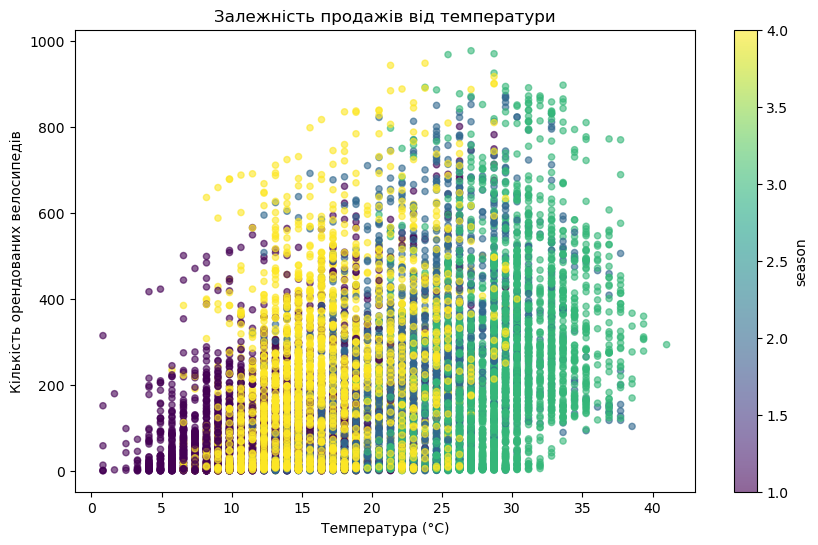

In [16]:
# Залежність продажів від відвідувачів
df.plot.scatter(
    x='temp',
    y='count',
    c='season',
    colormap='viridis',
    title='Залежність продажів від температури',
    figsize=(10, 6),
    alpha=0.6,
    xlabel='Температура (°C)',
    ylabel='Кількість орендованих велосипедів'
)
plt.show()

Прослідковується позитивна кореляція між температурою та кількістю оренд: чим вища температура- тим більша кількість оренд. Проте від 35 градусів кількість продажів знову потроху зменшуються. Це може говорити про зв'язок між спекою й кількістю оренд, або про температуру в дослідженому регіоні.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

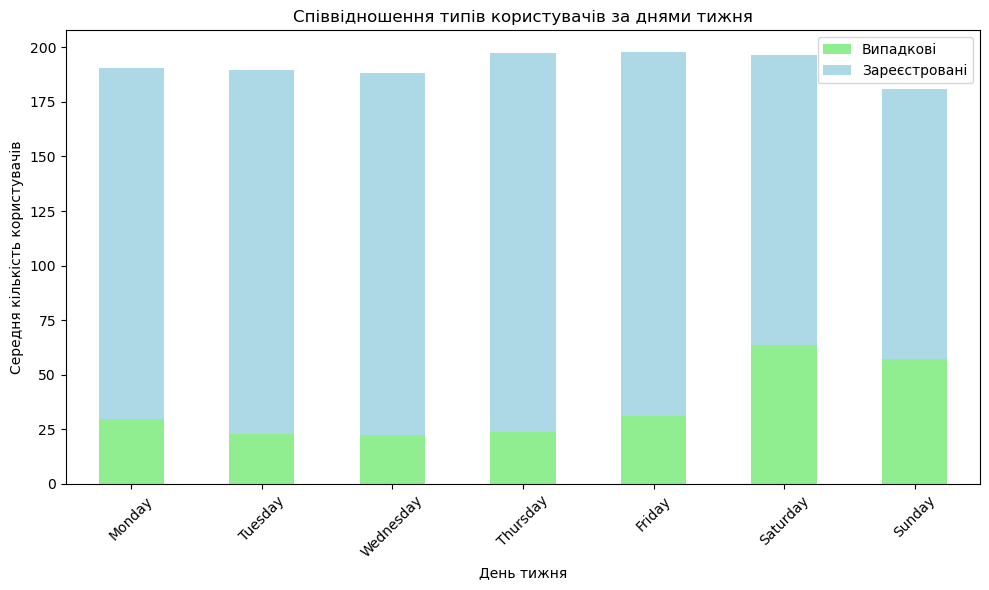

In [21]:
data_weekly = df.groupby('weekday')[['casual', 'registered']].mean()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_weekly = data_weekly.reindex(day_order)

data_weekly.plot.bar(
    stacked=True,
    figsize=(10, 6),
    color=['lightgreen', 'lightblue'],
    title='Співвідношення типів користувачів за днями тижня'
)

plt.xlabel('День тижня')
plt.ylabel('Середня кількість користувачів')
plt.legend(['Випадкові', 'Зареєстровані'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Кількість зареєстрованих користувачів переважає над випадковими впродовж всіх днів тижня. Найбільше зареєстровані користувачі користуються послугами оренди з Четверга по Суботу.
Випадкові користувачі можуть бути новими користувачами, які лише приглядаються до застосунку, чи туристами, які не є регулярними клієнтами, й які не планують реєструватись. Зареєстровані клієнти скоріш за все є постійними мешканцями дослідженого регіону, що користуються послугами на постіній основі для побутових цілей: подорожі на роботу, навчання, за покупками, прогулянки тощо.